<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Juan Pablo Rivera | Andrés Green.

**Fecha:** 24 de octubre del 2020.

**Expediente** : 714314 | 713504. 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:** https://github.com/andresgreen-byte/TareasConjunto_AndresG_JuanPablo_R

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
![imagen.png](attachment:imagen.png)

In [1]:
# Respuesta Andrés Green

import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Valor_aproximacion Crudo', 'Error_relativo% Crudo'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.rand(N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Valor_aproximacion Crudo"] = I_m
df.loc[N,"Error_relativo% Crudo"] = np.abs(df.loc[N,"Valor_aproximacion Crudo"]-I)*100/I

In [2]:
#Respuesta Andrés Green

def estratos():
    def est(B:"Numero de estratos"):
        '''Esta funcion nos genera una muestra estratificada con B estratos'''
        u=np.random.rand(B)
        i=np.arange(0,B)
        v=(u+i)/B
        return v
    N = np.logspace(1,7,7,dtype=int) #Creando nuestros numeros de estratos
    ui=list(map(lambda x:est(x),N)) #nuestro vector estratificado con listas de Diferente estratos N
    I_e = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui)) #integral
    return I_e
I_e=estratos()

df.loc[N,"Valor_aproximacion Estratificado"] = I_e
df.loc[N,"Error_relativo% Estratificado"] = np.abs(df.loc[N,"Valor_aproximacion Estratificado"]-I)*100/I
df
    

,Valor_aproximacion Crudo,Error_relativo% Crudo,Valor_aproximacion Estratificado,Error_relativo% Estratificado
Cantidad_terminos,,,,
10,0.370283,11.084953,0.348177,4.453059e+00
100,0.380716,14.214856,0.333788,1.362972e-01
1000,0.330519,0.844438,0.333336,6.925299e-04
10000,0.332537,0.238815,0.333332,2.911381e-04
100000,0.333264,0.020653,0.333333,6.959759e-06
1000000,0.333066,0.080232,0.333333,7.048354e-08
10000000,0.333291,0.012605,0.333333,1.699824e-09


In [3]:
# Respuesta 1 Juan Pablo
df = pd.DataFrame(index=N,columns=["Valor_aproximacion", "Error_relativo%"], dtype="float")
df.index.name = "Cantidad_terminos"
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

I = 1/3
a = 0
b = 1
N = np.logspace(1,7,7,dtype=int)
# Números aleatorios 
ui = list(map(lambda N:np.random.rand(N),N))
# Calcular la aproximación por montecarlo 
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))
df.loc[N,"Valor_aproximacion"] = I_m
df.loc[N,"Error_relativo% "] = np.abs(df.loc[N,"Valor_aproximacion"]-I)*100/I

In [4]:
# Respuesta 1 Juan Pablo
def muestreo_estra():
    def est(B:"Numero de estratos"):
        '''Esta funcion nos genera una muestra estratificada'''
        u=np.random.rand(B)
        i=np.arange(0,B)
        v=(u+i)/B
        return v
    N = np.logspace(1,7,7,dtype=int) 
    ui=list(map(lambda x:est(x),N)) 
    I_e = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))
    return I_e

Ie=muestreo_estra()
df.loc[N,"Valor_aproximacion Estratificado"] = Ie
df.loc[N,"Error_relativo% Estratificado"] = np.abs(df.loc[N,"Valor_aproximacion Estratificado"]-I)*100/I
df

,Valor_aproximacion,Error_relativo%,Error_relativo%,Valor_aproximacion Estratificado,Error_relativo% Estratificado
Cantidad_terminos,,,,,
10,0.503795,NaN,51.138403,0.314034,5.789904e+00
100,0.286641,NaN,14.007758,0.333050,8.498898e-02
1000,0.337279,NaN,1.183794,0.333335,5.479362e-04
10000,0.336059,NaN,0.817597,0.333333,5.215261e-06
100000,0.332433,NaN,0.270145,0.333333,2.900278e-06
1000000,0.333577,NaN,0.072987,0.333333,2.497147e-07
10000000,0.333411,NaN,0.023395,0.333333,1.514072e-09


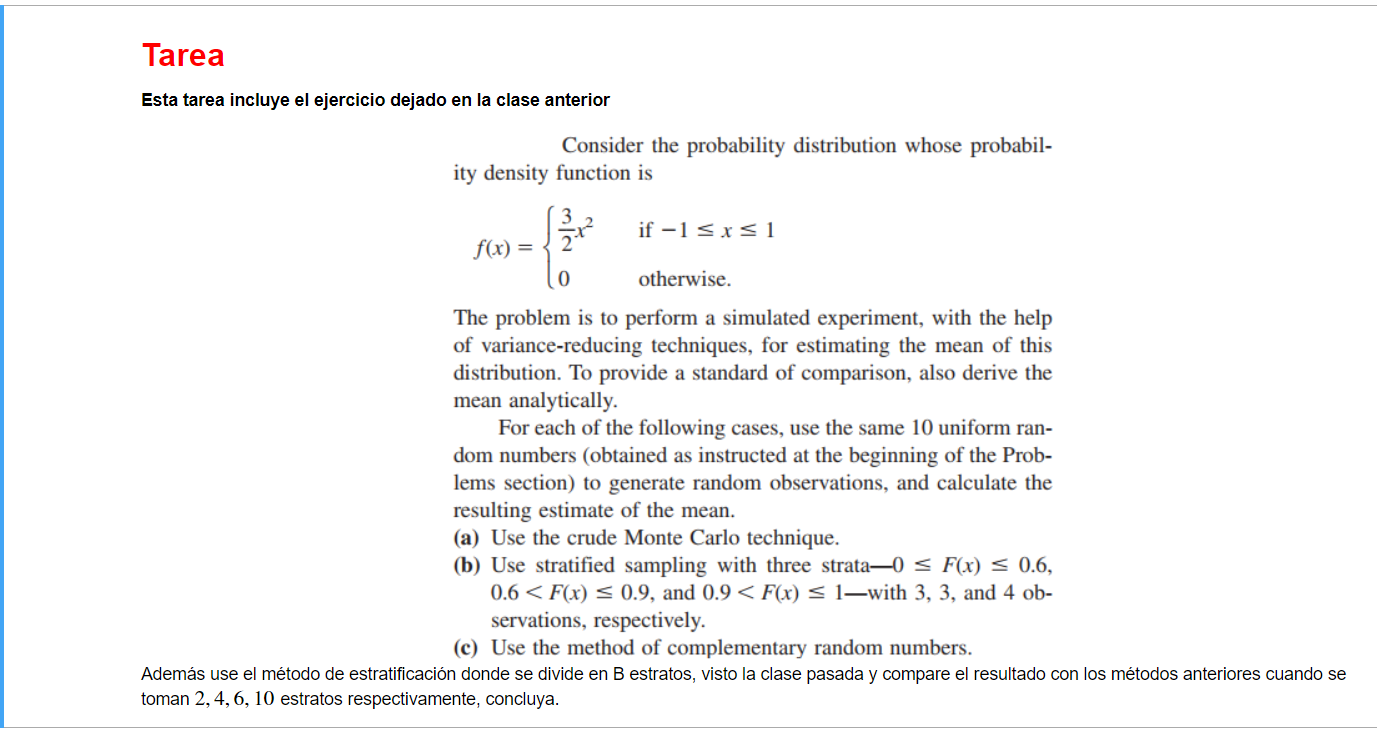

In [5]:
# Respuesta 2 Andrés Green

##MonteCarlo Crudo:
N=10
uu=np.random.rand(N)
xx=lambda x: np.exp(x)
mc=list(map(xx,uu))
mm=np.mean(mc)
d= lambda x: (3/2)*(x**2)

# Respuesta 2 Andrés Green

##MonteCarlo Estratificado:
u1=np.random.uniform(0,0.6)
u2=np.random.uniform(0.6,0.9)
u3=np.random.uniform(.9,1)
ww=[((3/10)/.6),((3/10)/.3),((4/10)/.1)]
U=[u1,u2,u3]
mep=list(map(lambda ui,wi:xx(ui)/wi,U,ww))


##Metodo Complementario:
N2=5
u2=np.random.rand((N2))
ucom=1-u2
mc=list(map(xx,u2))
mcc=list(map(xx,ucom))
mc,mcc= np.array(mc),np.array(mcc)
medmc= (mc.mean()+mcc.mean())/2

## Data frame 
mon=pd.DataFrame(index=['Media Estimada'],columns=['MonteCarlo Crudo','MonteCarlo Estratificado','Metodo Complementario'], dtype='float')
mon.loc['Media Estimada',"MonteCarlo Crudo"] = np.concatenate((mep,mep)).mean()
mon.loc['Media Estimada',"MonteCarlo Estratificado"] = mm
mon.loc['Media Estimada',"Metodo Complementario"]= medmc
mon

,MonteCarlo Crudo,MonteCarlo Estratificado,Metodo Complementario
Media Estimada,1.813404,2.060985,1.734557


In [6]:
##Estratificado por estratos:
N=[2,4,6,10]
ui = list(map(lambda N:(np.random.uniform(0,1,N)),N))
ii = list(map(lambda N:np.arange(0,N),N))# i en la formula 
s=list((np.array(ii)+np.array(ui))/N) # XB
# Aproximacion por Muestreo Estratificado:
meN = list(map(lambda u: xx(u),s))
meNmedia=[meN[0].mean(),meN[1].mean(),meN[2].mean(),meN[3].mean()]

mes= pd.DataFrame(index=N,columns=['Media Estimada'])
mes.loc[N[0],"Media Estimada"]= meNmedia[0]
mes.loc[N[1],"Media Estimada"]= meNmedia[1]
mes.loc[N[2],"Media Estimada"]= meNmedia[2]
mes.loc[N[3],"Media Estimada"]= meNmedia[3]
mes

,Media Estimada
2,1.65764
4,1.73901
6,1.75817
10,1.71969


In [7]:
# Respusta 2 Juan Pablo
# A) MonteCarlo
N=10
uu=np.random.rand(N)
xx=lambda x: np.exp(x)
mc=list(map(xx,uu))
mm=np.mean(mc)
mm

1.6396473415082369

In [8]:
# B) MonteCarlo Estratificado
u1=np.random.uniform(0,0.6)
u2=np.random.uniform(0.6,0.9)
u3=np.random.uniform(.9,1)
ww=[((3/10)/.6),((3/10)/.3),((4/10)/.1)]
U=[u1,u2,u3]
mep=list(map(lambda ui,wi:xx(ui)/wi,U,ww))
np.mean(mep)

1.7314133803616745

In [9]:
# C) Metodo Complementario:
N2=5
u2=np.random.rand((N2))
ucom=1-u2
mc=list(map(xx,u2))
mcc=list(map(xx,ucom))
mc= np.array(mc)
mcc=np.array(mcc)
medmc= (mc.mean()+mcc.mean())/2
medmc

1.7465915060291557

In [10]:
# Respuesta 2 Juan Pablo
#Comparacion 
N=[2,4,6,10]
ui = list(map(lambda N:(np.random.uniform(0,1,N)),N))
ii = list(map(lambda N:np.arange(0,N),N))# i en la formula 
s=list((np.array(ii)+np.array(ui))/N) # XB
# Aproximacion por Muestreo Estratificado:
meN = list(map(lambda u: xx(u),s))
meNmedia=[meN[0].mean(),meN[1].mean(),meN[2].mean(),meN[3].mean()]
meNmedia

[1.4876438504529856, 1.711509223196996, 1.6757991636701488, 1.7276029005923832]